In [3]:
#cifar10에서 데이터를 로드
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape)
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3])
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape)
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2])

170498071/170498071 [==============================] - 2s 0us/step
Training data:
Number of examples:  (50000, 32, 32, 3)
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: (10000, 32, 32, 3)
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8
(50000, 1) uint8


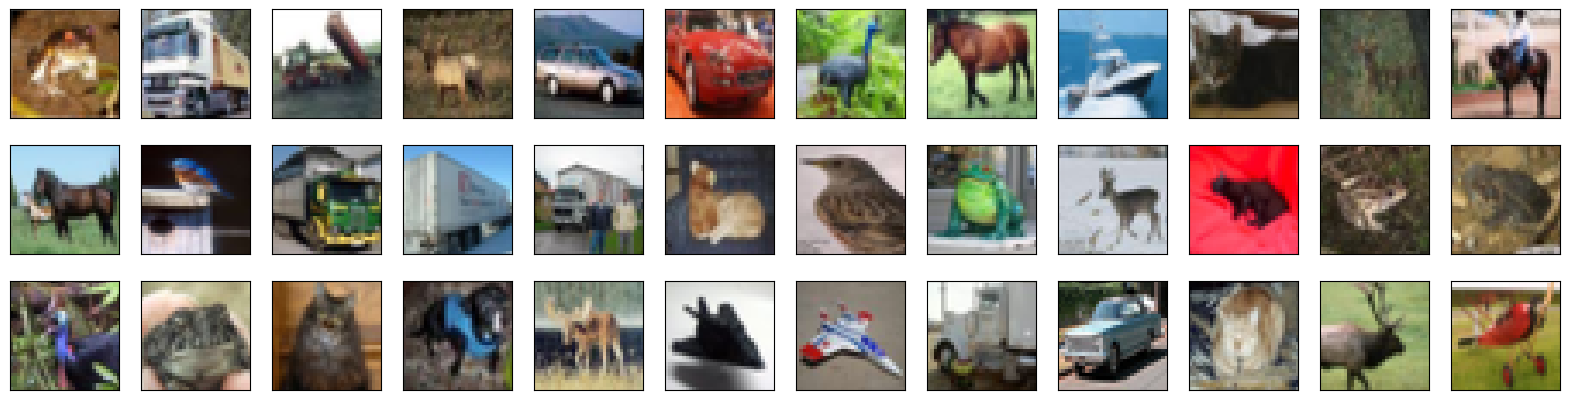

In [5]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [6]:
X_train = X_train/255.0
X_test = X_test /255.0

In [ ]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
input_shape = (32, 32, 3)     # 행, 열, 채널

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), padding='same',
         input_shape = input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [ ]:
# 모델 컴파일 하기
model_checkpoint = ModelCheckpoint(filepath =  "./model/cyfar_model.h5", monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)

# 모델 학습과정 설정하기
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])

In [ ]:
# fit() 메서드로 모델 훈련 시키기
hist = model.fit(
    X_train, Y_train,
    epochs = 20, batch_size = 128,
    validation_data=(X_test, Y_test),
    callbacks = [model_checkpoint, early_stopping]
    )

Epoch 1/20
385/391 [============================>.] - ETA: 0s - loss: 1.5822 - accuracy: 0.4265
Epoch 1: val_loss improved from inf to 1.23903, saving model to ./model/cyfar_model.h5
391/391 [==============================] - 5s 11ms/step - loss: 1.5777 - accuracy: 0.4287 - val_loss: 1.2390 - val_accuracy: 0.5608
Epoch 2/20
387/391 [============================>.] - ETA: 0s - loss: 1.2209 - accuracy: 0.5641
Epoch 2: val_loss improved from 1.23903 to 1.09279, saving model to ./model/cyfar_model.h5
391/391 [==============================] - 4s 9ms/step - loss: 1.2207 - accuracy: 0.5640 - val_loss: 1.0928 - val_accuracy: 0.6185
Epoch 3/20
387/391 [============================>.] - ETA: 0s - loss: 1.0921 - accuracy: 0.6115
Epoch 3: val_loss improved from 1.09279 to 0.97993, saving model to ./model/cyfar_model.h5
391/391 [==============================] - 4s 9ms/step - loss: 1.0912 - accuracy: 0.6118 - val_loss: 0.9799 - val_accuracy: 0.6543
Epoch 4/20
387/391 [============================>

In [ ]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7022 - accuracy: 0.7635
test_acc:  0.7634999752044678


In [ ]:
predit = model.predict(X_test)
#for i in range(0,len(predit)) :
#    print("예측값 : ", predit[i], "\t실제값 : ", test_Y[i])
print(predit[0:5])
print(Y_test[0 :5])

313/313 [==============================] - 1s 2ms/step
[[7.60959170e-04 3.73879471e-03 1.01826177e-03 6.56507611e-01
  5.20992617e-04 3.06492299e-01 1.35958502e-02 5.61428547e-04
  1.13292756e-02 5.47455205e-03]
 [1.28121395e-03 7.41160870e-01 9.67692504e-09 5.96758625e-08
  3.24197003e-09 6.33471831e-10 1.42651437e-08 8.96961047e-11
  2.57452697e-01 1.05123916e-04]
 [1.86658666e-01 2.94507686e-02 3.16655007e-03 5.59752434e-03
  5.70737291e-03 8.92851327e-04 3.96433228e-04 3.05153220e-03
  7.12888420e-01 5.21898381e-02]
 [8.58744323e-01 7.46272504e-04 2.11875122e-02 5.70065202e-03
  7.91419821e-04 4.26683509e-05 4.87080652e-05 1.55218822e-05
  1.10008113e-01 2.71480531e-03]
 [1.48925224e-07 2.09983091e-06 1.44781983e-02 3.18689018e-01
  1.59479663e-01 1.13312926e-04 5.07235825e-01 1.29020052e-07
  1.49149298e-06 1.66593438e-07]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0

313/313 [==============================] - 1s 3ms/step


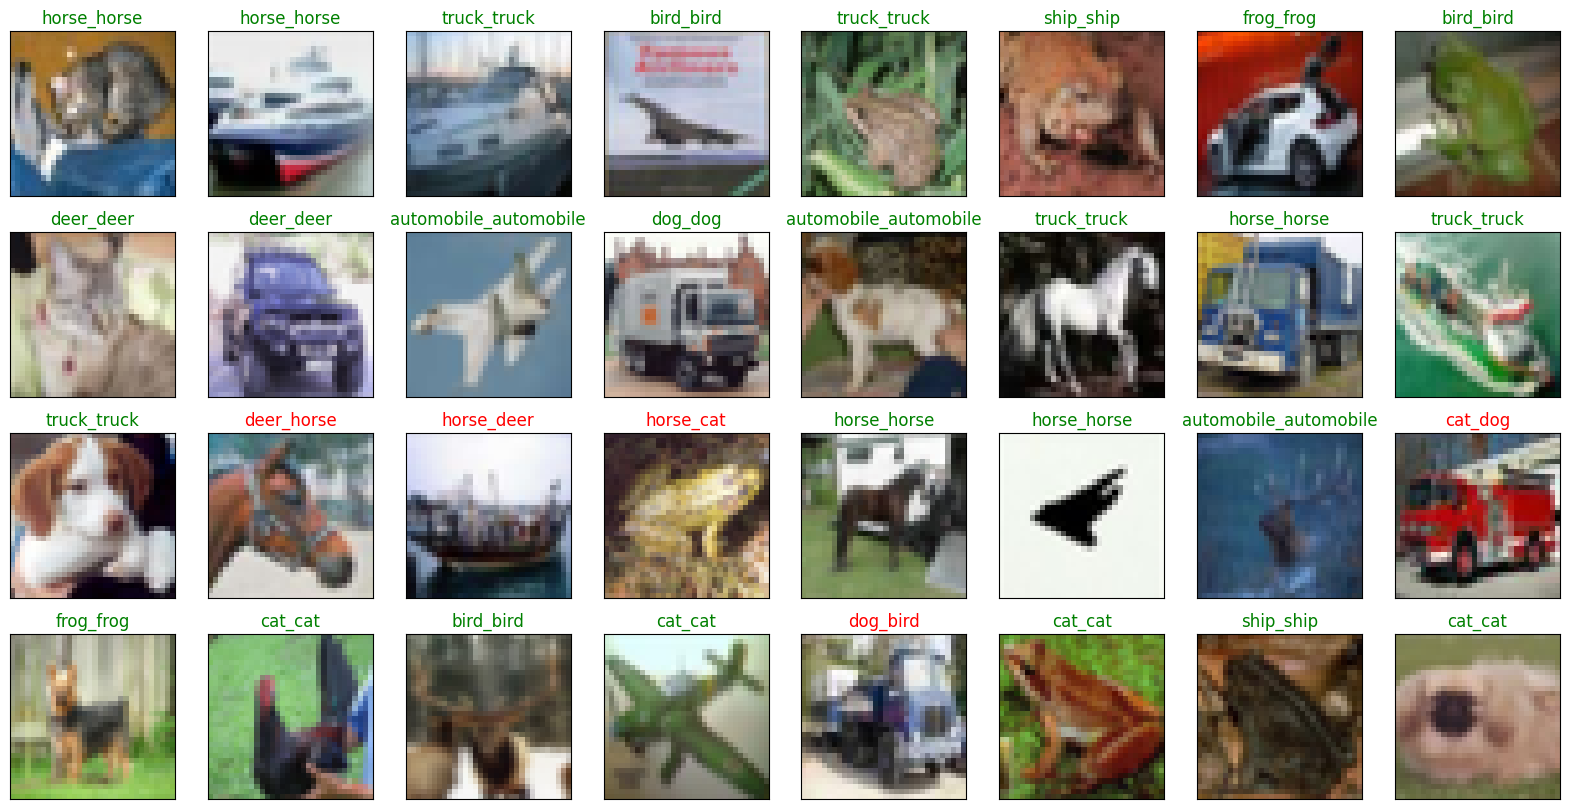

In [ ]:
pred = model.predict(X_test)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20,10))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1 , xticks=[], yticks=[])
    ax.imshow(X_test[i])

    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(Y_test[idx])

    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')